# Gramener Case Study - Exploratory Data Analysis

### Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1.Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

   **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

   **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These                 candidates are not labelled as 'defaulted'.

   **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on                     the loan 

**2.Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the                      loan was rejected, there is no transactional history of those applicants with the company and so this data                      is not available with the company (and thus in this dataset)

### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

# Analysis

The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning
3. Data Analysis 
4. observations

# Data understanding

In [2]:
#lets import all the librearies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing the csv file
os.chdir("F://Study//Sem-6//upgrad//loan")
path=os.getcwd()+"/loan.csv"                             #for storing the path
df=pd.read_csv(path)
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade            ...              \
0   10.65%       162.87     B        B2            ...               
1   15.27%        59.83     C        C4            ...               
2   15.96%        84.33     C        C5            ...               
3   13.49%       339.31     C        C1            ...               
4   12.69%        67.79     B        B5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                NaN              

In [5]:
#for knowing the type of data in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#to know number of columns and rows in a dataset
df.shape

(39717, 111)

In [ ]:
df.corr()

In [ ]:
sns.pairplot(df)

In [8]:
#the description of the files while it has quartiles in the columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [10]:
#To Count the number of rows in each Column if will find any missing values 
print(df.count()) 

id                                39717
member_id                         39717
loan_amnt                         39717
funded_amnt                       39717
funded_amnt_inv                   39717
term                              39717
int_rate                          39717
installment                       39717
grade                             39717
sub_grade                         39717
emp_title                         37258
emp_length                        38642
home_ownership                    39717
annual_inc                        39717
verification_status               39717
issue_d                           39717
loan_status                       39717
pymnt_plan                        39717
url                               39717
desc                              26777
purpose                           39717
title                             39706
zip_code                          39717
addr_state                        39717
dti                               39717


importing the dataset and observing the data is done. Now lets do the data cleaning and delete the not usable columns beacouse it will be a mess if we consider all the tables and also remove the null values or rows if possible

# Data Cleaning

the main importnant step in EDA is to clean the data. so that we can predict the useful information





In [14]:
#To check the sum of the null values in each column
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [15]:
#To See the percentile of null values in  each column
round(df.isnull().sum()/len(df.index),2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


in last there are many rows which are having total null values

In [17]:
#lets remove the columns which are having more than 90% null values beacuse these does not show much effect on the data
data_90 = df.columns[(df.isnull().sum()/len(df.index))*100 > 90]

In [18]:
#lest check the all the columns
data_90

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [20]:
#lets drop those columns
df= df.drop(data_90, axis=1)

In [21]:
#lest drop the columns which are not necessary 
df = df.drop(["desc", 
  "mths_since_last_delinq",
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  "title", 
  "url", 
  "zip_code", 
  "addr_state"],axis = 1)

In [22]:
#now lets check in all rows
df.isnull().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [26]:
#check the rows which are having greater than 5 missing values
len(df[df.isnull().sum(axis=1)>5])

0

In [27]:
#lest check the remaining columns which are left after cleaning
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [28]:
#lets check the unique values in columns so we can filter more columns for analysis
print("unique collections_12_mths_ex_med : %d"  % len(df.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(df.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(df.pub_rec_bankruptcies.unique()))
print("unique emp_length : %d"  % len(df.emp_length.unique()))
print("unique emp_title : %d"  % len(df.emp_title.unique()))
print("unique tax_liens : %d"  % len(df.tax_liens.unique()))
print("unique grade : %d" %len(df.grade.unique()))
print("unique sub_grade: %d" %len(df.sub_grade.unique()))
print("unique acc_now_delinq: %d" %len(df.acc_now_delinq.unique()))
print("unique initial_list_status: %d" %len(df.initial_list_status.unique()))
print("unique pymnt_plan: %d" %len(df.pymnt_plan.unique()))
print("unique verification_status: %d"%len(df.verification_status.unique()))

unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique emp_length : 12
unique emp_title : 28821
unique tax_liens : 2
unique grade : 7
unique sub_grade: 35
unique acc_now_delinq: 1
unique initial_list_status: 1
unique pymnt_plan: 1
unique verification_status: 3


### some of the columns having 1,2 unique values. these does not show munch effect for the further analysis

In [29]:
#lets check those unique values
df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [30]:
df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [31]:
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [32]:
df.tax_liens.unique()

array([ 0., nan])

In [33]:
df.acc_now_delinq.unique()

array([0], dtype=int64)

In [34]:
df.initial_list_status.unique()

array(['f'], dtype=object)

In [35]:
df.pymnt_plan.unique()

array(['n'], dtype=object)

In [36]:
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

### these columns having 0, nan value rows. so lets get rid of these columns

In [37]:
#drop those columns
df = df.drop(['acc_now_delinq','collections_12_mths_ex_med', 'pymnt_plan','chargeoff_within_12_mths', 'initial_list_status','tax_liens'], axis=1)

In [38]:
#lets check the remaining columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'policy_code',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [39]:
#lets check the cloumns not having the 0's values percentile
nan_val = round(100*(df.isnull().sum()/len(df.index)), 2) 
nan_val[nan_val != 0]

emp_title               6.19
emp_length              2.71
pub_rec_bankruptcies    1.75
dtype: float64

In [40]:
#lest remove the 0's rows from the table
df = df[~df.emp_title.isnull()]
df = df[~df.emp_length.isnull()]
df = df[~df.pub_rec_bankruptcies.isnull()]

In [41]:
#lest check again for any 0 values present
nan_val = round(100*(df.isnull().sum()/len(df.index)), 2) 
nan_val[nan_val != 0]

Series([], dtype: float64)

In [42]:
df.shape

(36548, 22)

In [44]:
#remove the % from the values and covert it into numeric so that it will be useful for further analysis
df['int_rate'] = df['int_rate'].apply(lambda a: pd.to_numeric(a.split("%")[0]))
print(df.head())

AttributeError: 'float' object has no attribute 'split'

In [45]:
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1  1077430    1314167       2500         2500           2500.0   60 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   

   int_rate  installment grade sub_grade          ...          home_ownership  \
1     15.27        59.83     C        C4          ...                    RENT   
3     13.49       339.31     C        C1          ...                    RENT   
4     12.69        67.79     B        B5          ...                    RENT   
5      7.90       156.46     A        A4          ...                    RENT   
6     15.96       170.08     C        C5          ...                    RENT   

  annual_inc verification_status  issue_d  l

### 0 be years less than 1 year and 10 be the year with greater that 10 years

In [46]:
# covert the years into numeric so that it will be useful for further analysis
years= {'< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}

In [47]:
#replace the dictoinary values into the tbale
df = df.replace({"emp_length":years})

In [48]:
df.emp_length

1         0
3        10
4         1
5         3
6         8
7         9
9         0
10        5
11       10
12        0
13        3
14        3
15        0
16        4
17       10
18        1
19        6
20        3
21       10
22       10
23        5
24        1
25        2
26        9
27        2
28       10
29        0
31        5
32        2
33        2
         ..
38995     0
38996    10
38997     3
38998     0
38999     7
39000    10
39001     1
39002     4
39003     6
39013     4
39052     0
39084    10
39138    10
39216    10
39220     4
39251     0
39288    10
39291     5
39346     1
39348    10
39362    10
39425     1
39430     9
39433     7
39475     6
39551     2
39562     1
39623     8
39666     2
39680     2
Name: emp_length, Length: 36548, dtype: int64

In [49]:
#total number of values in each catogery
df['loan_status'].value_counts()

Fully Paid     30463
Charged Off     5019
Current         1066
Name: loan_status, dtype: int64

### current is the condition with combination of both fully paid and charged off values. the final analysis which need to be done in this to predict the reasons for the revenue loose an for whon the loan must need to be given.
### current is the condition which is not usefull before approving the loan. so lets drop that values

In [50]:
#remove the values of current and keep only the Fully paid and charged off values
df = df[df['loan_status']!='Current']
df['loan_status'].value_counts()

Fully Paid     30463
Charged Off     5019
Name: loan_status, dtype: int64

In [51]:
#covert the fully paid and charged off values into integers
df['loan_status'] = df['loan_status'].apply(lambda a: 0 if a=='Fully Paid' else 1)
df['loan_status'] = df['loan_status'].apply(lambda d: pd.to_numeric(d))
df['loan_status'].value_counts()

0    30463
1     5019
Name: loan_status, dtype: int64

# Univarite analysis

In [52]:
#check the mean of loan status. it means lets derive the defaulter rate 
round(np.mean(df['loan_status']),2)*100

14.000000000000002

### 14 is defaulter rate from this database

lets check a graph between loan_status and categorical variables

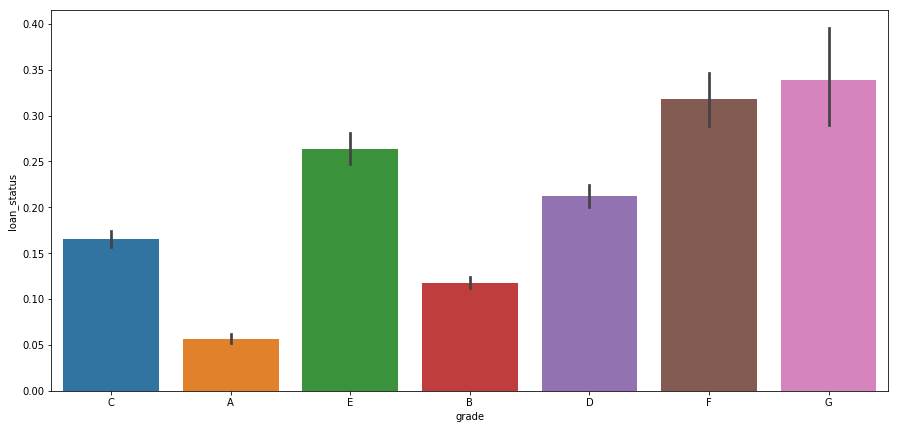

In [53]:
# graph between grades and loan_status
plt.figure(figsize=(15,7))
sns.barplot(x='grade',y='loan_status',data=df)
plt.show()

here we can see that A is having the least and G is having the more. and the values increases from A to G

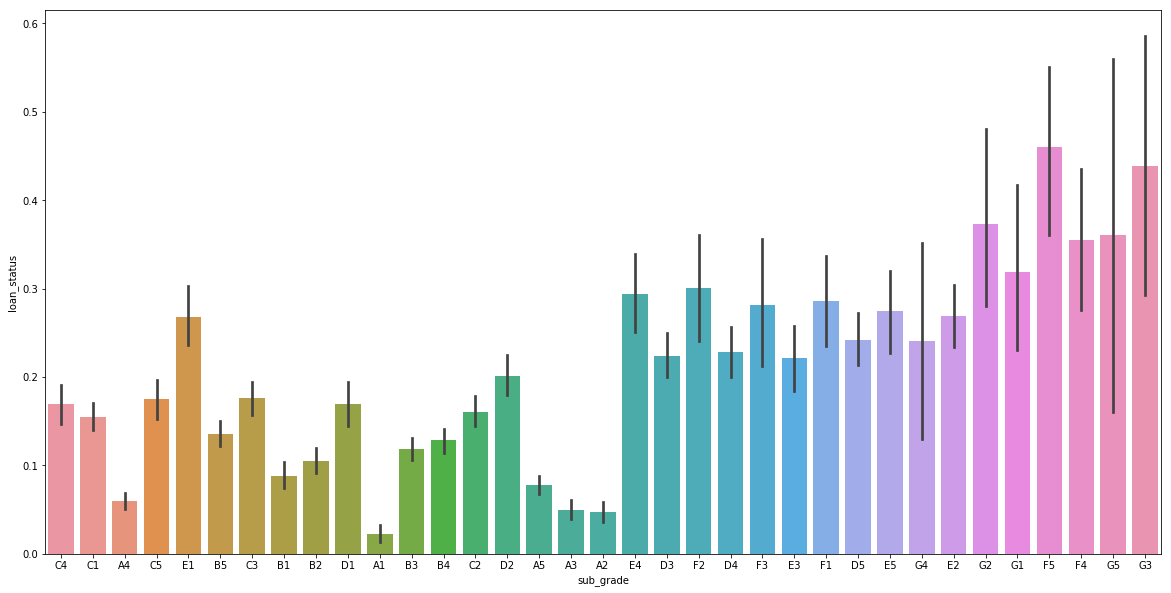

In [54]:
#lets chrck a graph between loan status and sub garde
plt.figure(figsize=(20,10))
sns.barplot(x='sub_grade',y='loan_status',data=df)
plt.show()

This is also having the same like above graph i.e the values are increasing from A to G

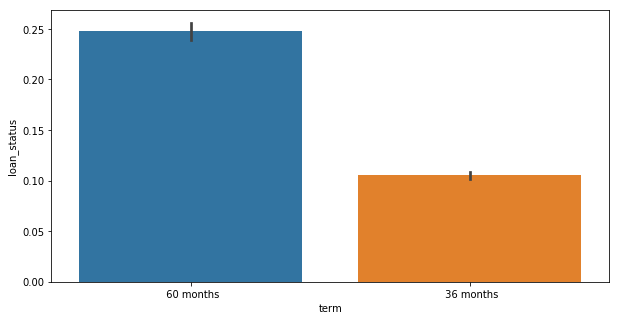

In [55]:
#lest do the analysis for term and loan_status
plt.figure(figsize=(10,5))
sns.barplot(x='term',y='loan_status',data=df)
plt.show()

here we can clearly see that 60 months is having high rate than 36 months

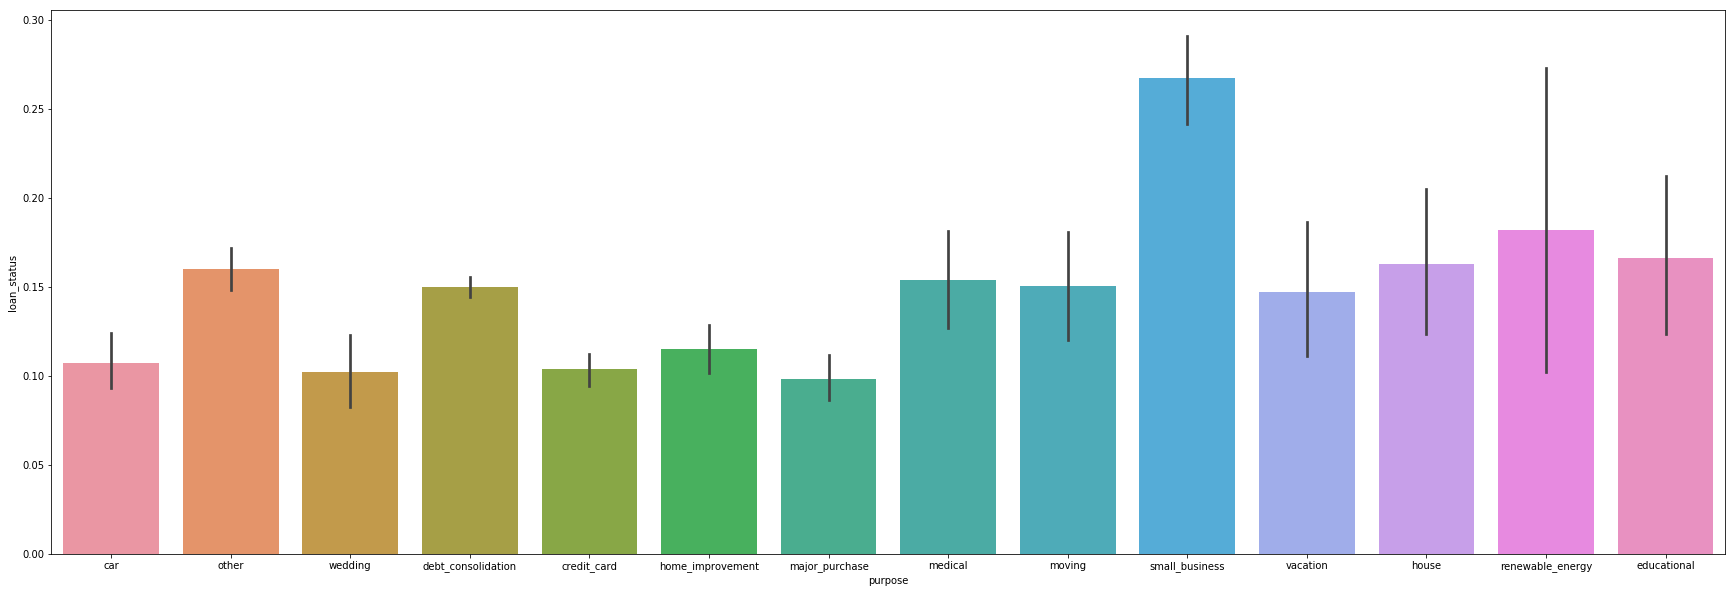

In [56]:
#lets do a graph between purpose and loan status
plt.figure(figsize=(30,10))
sns.barplot(x='purpose',y='loan_status',data=df)
plt.show()

small business is having the highest value

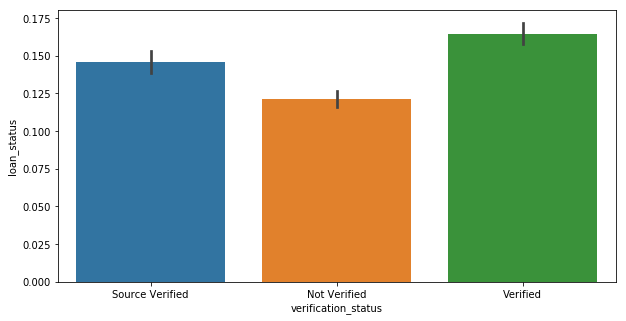

In [57]:
#lets plot a graph between verification status and loan status
plt.figure(figsize=(10,5))
sns.barplot(x='verification_status',y='loan_status',data=df)
plt.show()

verified is having the highest value than source verified and Not verified

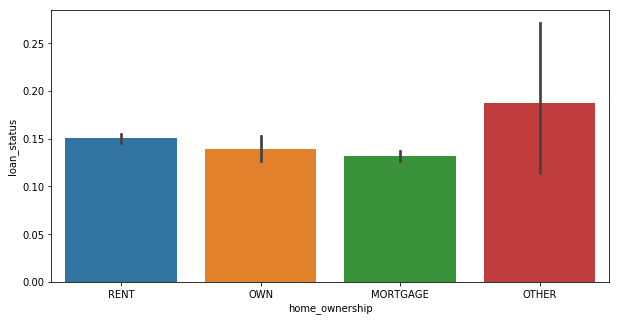

In [58]:
#lets plpot a graph between hoem ownership and loan status
plt.figure(figsize=(10,5))
sns.barplot(x='home_ownership',y='loan_status',data=df)
plt.show()

lets convert the issue_d date into separated month and year so that we can easily plot a graph between year and loan_status, month and loan status

In [59]:
#splitting the date,month from issue_d
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
df['month_issue'] = df['issue_d'].apply(lambda a: a.month)
df['year_issue'] = df['issue_d'].apply(lambda a: a.year)
df = df.drop(['issue_d'],axis=1)

In [60]:
#count the value in every month
df['month_issue'].value_counts()

12    3826
11    3689
10    3449
9     3286
8     3195
7     3130
6     2992
5     2751
4     2675
3     2409
1     2056
2     2024
Name: month_issue, dtype: int64

from above table we can see that december is having thr highest distribution

In [61]:
# in the same way lets also count the year distribution
df['year_issue'].value_counts()

2011    19131
2010    10836
2009     4448
2008     1061
2007        6
Name: year_issue, dtype: int64

the distribution rate is increasing from 2007 to 2011

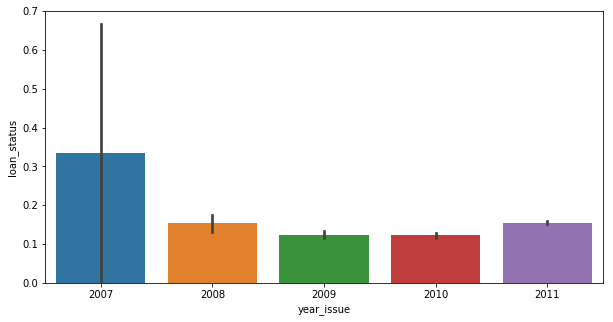

In [62]:
#lets plot a graph between year issued and loan status
plt.figure(figsize=(10,5))
sns.barplot(x='year_issue',y='loan_status',data=df)
plt.show()

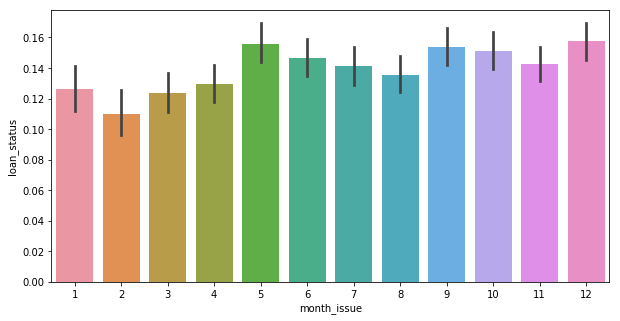

In [63]:
#plot a graph between month issued and loan status

plt.figure(figsize=(10,5))
sns.barplot(x='month_issue',y='loan_status',data=df)
plt.show()

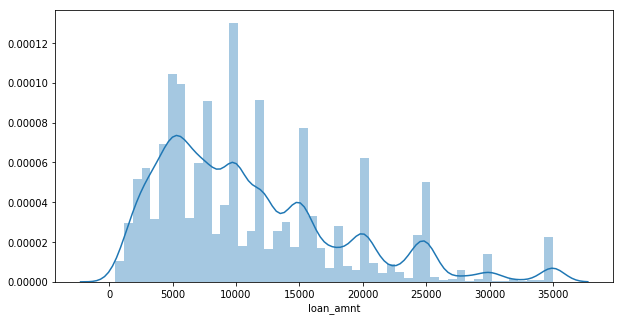

In [65]:
#lets see a distplot for loan amount
plt.figure(figsize=(10,5))
sns.distplot(df['loan_amnt'])
plt.show()

lets divide the loan_amount,funded_amnt_inv,int_rate ..etc like low, medium, high so that it will be possible for us to plot a grpah between them and loan status. we can divide the values according to our convience for low,medum

In [70]:
#create a function and divide into subdivisions for better understanding
def fun(x):
    if x<10000:
        return 'amount < 10000'
    if x>=10000 and x<20000:
        return 'inbetween 10000 and 20000'
    else:
        return 'more than 20000'

In [71]:
#apply that function to loan ammount and divide them.
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: fun(x))

TypeError: '<' not supported between instances of 'str' and 'int'

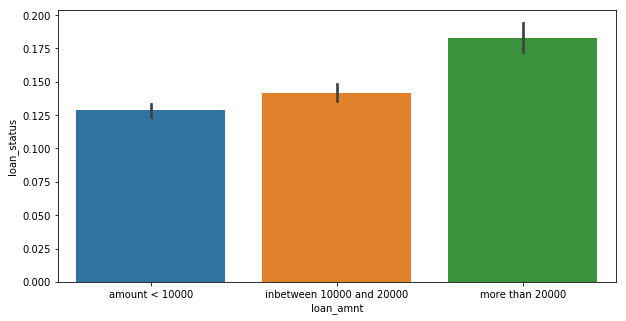

In [72]:
#plot the graph for loan ammount and loan status
plt.figure(figsize=(10,5))
sns.barplot(x='loan_amnt',y='loan_status',data=df)
plt.show()

more than 20000 have the greatest loan_status value

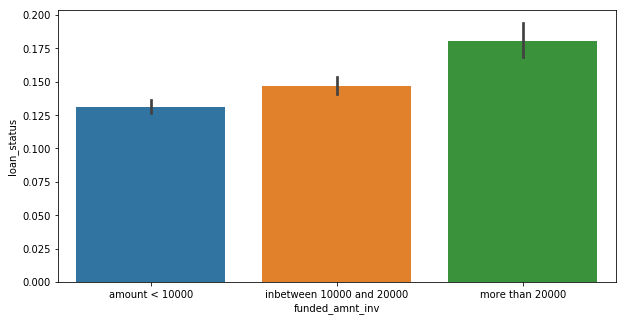

In [74]:
#plot a graph for funded ammount investement and loan status
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: fun(x))
plt.figure(figsize=(10,5))
sns.barplot(x='funded_amnt_inv',y='loan_status',data=df)
plt.show()

In [75]:
#create another function for int_rate and subdivide them
def fun1(x):
    if x <= 10:
        return 'lessthan or equa 10'
    elif x > 10 and x <=15:
        return 'inbetween 10 and 15'
    else:
        return 'greater than 15'
    
    
df['int_rate'] = df['int_rate'].apply(lambda a: fun1(a))

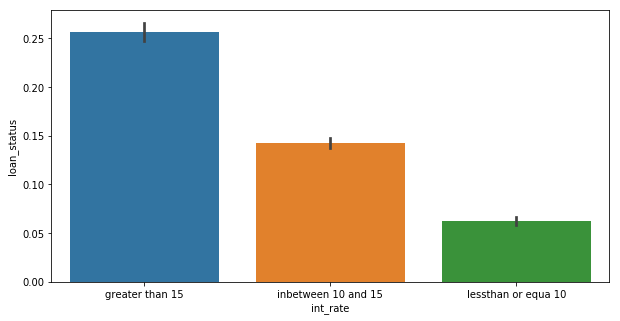

In [76]:
#plot a graph for int_rate and loan_status
plt.figure(figsize=(10,5))
sns.barplot(x='int_rate',y='loan_status',data=df)
plt.show()

greater than 15 has the highest rate

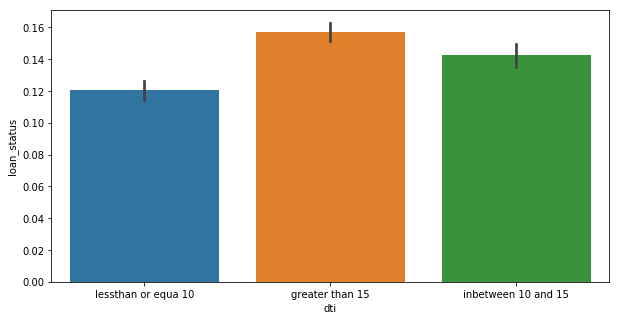

In [78]:
#apply the fun1 to dti and plot a graph between loan_status and dti
df['dti'] = df['dti'].apply(lambda a: fun1(a))
plt.figure(figsize=(10,5))
sns.barplot(x='dti',y='loan_status',data=df)
plt.show()

greater than 15 dti has the highest loan_status value

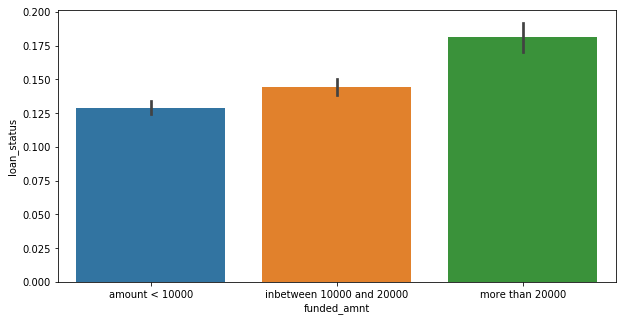

In [79]:
#apply fun to funded ammount and plot a graph between funded ammount and loan status
df['funded_amnt'] = df['funded_amnt'].apply(lambda a: fun(a))
plt.figure(figsize=(10,5))
sns.barplot(x='funded_amnt',y='loan_status',data=df)
plt.show()

more than 20000 has the highest rate

In [80]:
#create another function for installment
def fun3(n):
    if n < 300:
        return 'less than 300'
    elif n >= 300 and n <500:
        return 'inbetween 300 and 500'
    else:
        return 'greater than 500'
    
df['installment'] = df['installment'].apply(lambda a: fun3(a))

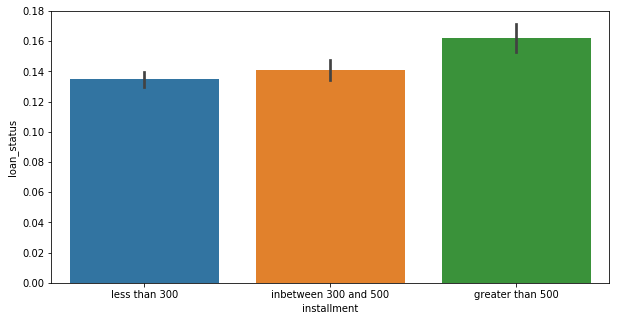

In [81]:
#plot a graph for installment and loan status
plt.figure(figsize=(10,5))
sns.barplot(x='installment',y='loan_status',data=df)
plt.show()

greater than 500 has the highest rate value

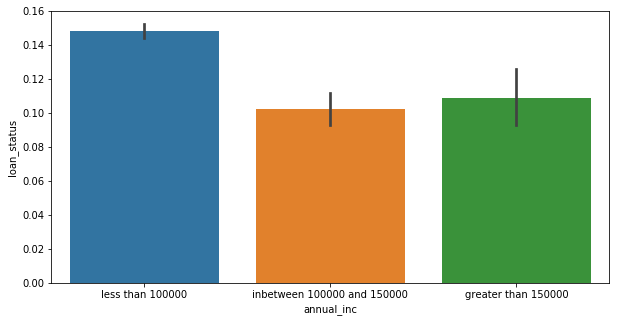

In [82]:
#create another function for annula income
def fun4(n):
    if n < 100000:
        return 'less than 100000'
    elif n >= 100000 and n <150000:
        return 'inbetween 100000 and 150000'
    else:
        return 'greater than 150000'

df['annual_inc'] = df['annual_inc'].apply(lambda x: fun4(x))
plt.figure(figsize=(10,5))
sns.barplot(x='annual_inc',y='loan_status',data=df)
plt.show()

lower than 100000 has the highest rate value

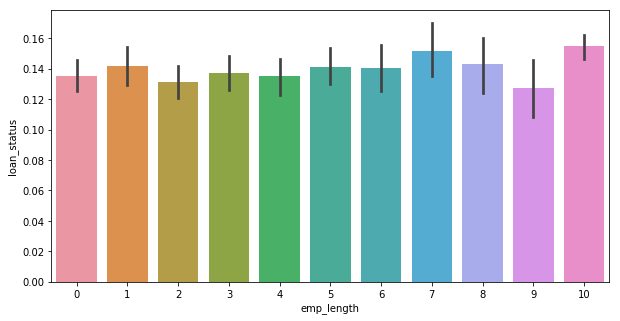

In [83]:
#lets plot a graph between emp_length and loan_status
plt.figure(figsize=(10,5))
sns.barplot(x='emp_length',y='loan_status',data=df)
plt.show()

## Segmented Univariate Analysis

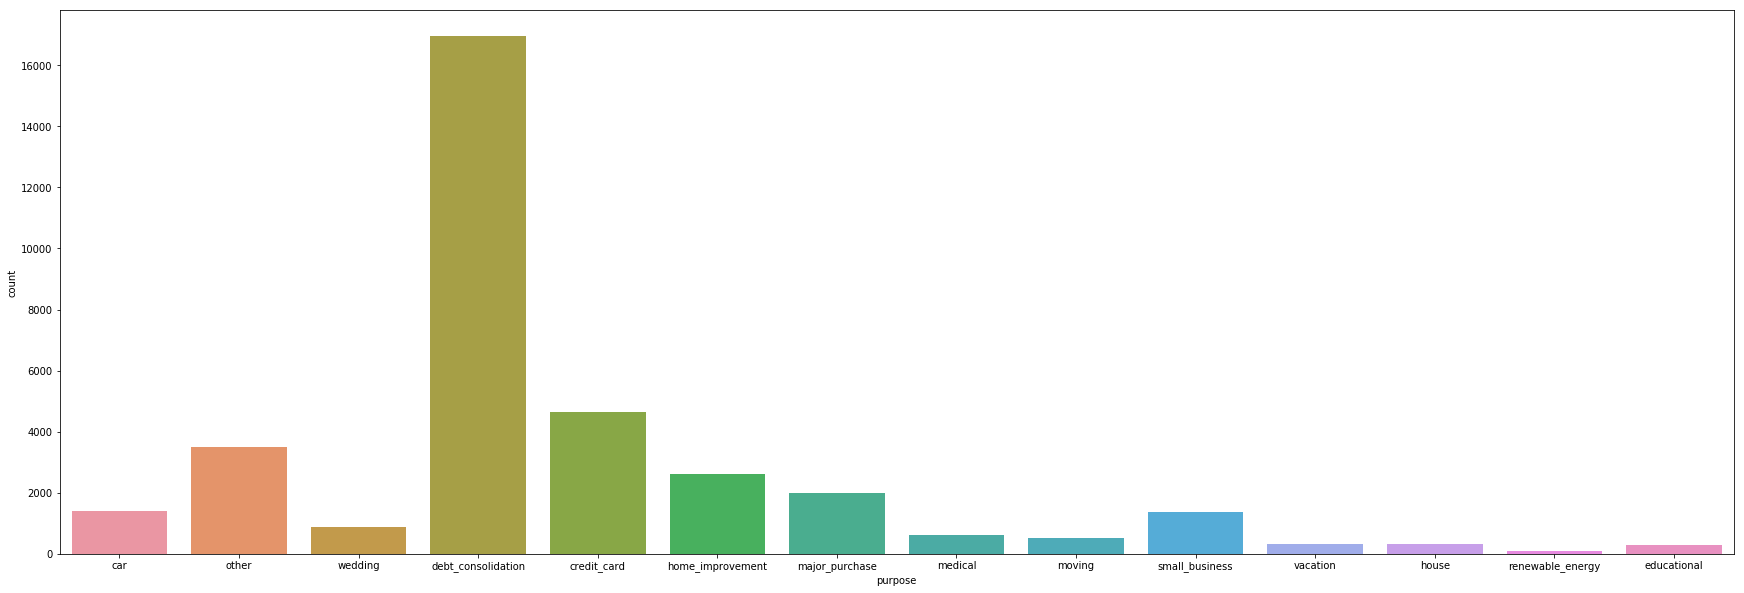

In [84]:
#lets plot a count graph for purpose so that we can find that for which purpose we have highest ammonut
plt.figure(figsize=(30, 10))
sns.countplot(x='purpose', data=df)
plt.show()

'debt_consolidation','credit_card','home_improvement','major_purchase' these are having the highest values

In [85]:
#for detail explanation lets count all of then
df['purpose'].value_counts()

debt_consolidation    16952
credit_card            4630
other                  3484
home_improvement       2620
major_purchase         1983
car                    1397
small_business         1359
wedding                 872
medical                 624
moving                  525
vacation                333
house                   332
educational             283
renewable_energy         88
Name: purpose, dtype: int64

In [86]:
#lets take out only the values which we wanted(which are having the haighest loans)
values_list = ['debt_consolidation','credit_card','home_improvement','major_purchase']

In [87]:
#take out the rows which we wanted form the data
df = df[df.purpose.isin(values_list)]

In [88]:
#now lets count them
df['purpose'].value_counts()

debt_consolidation    16952
credit_card            4630
home_improvement       2620
major_purchase         1983
Name: purpose, dtype: int64

lets start graphing the got values

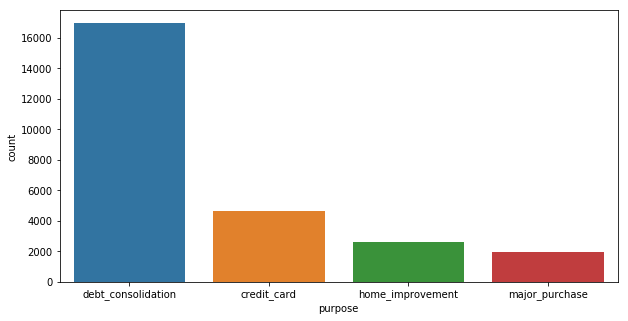

In [89]:
#plot a count plot for the purpose
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',data=df)
plt.show()

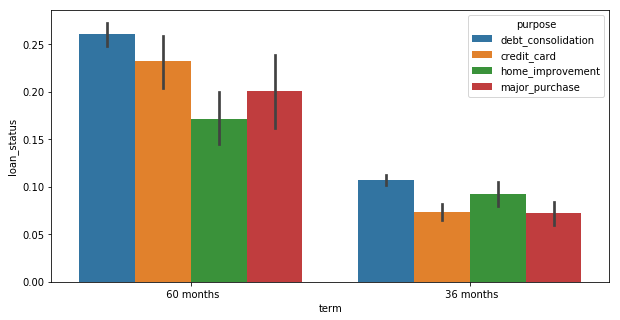

In [90]:
#plot a graph between term and loan_status and purpose
plt.figure(figsize=(10,5))
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

term for 60 months is having the highest values

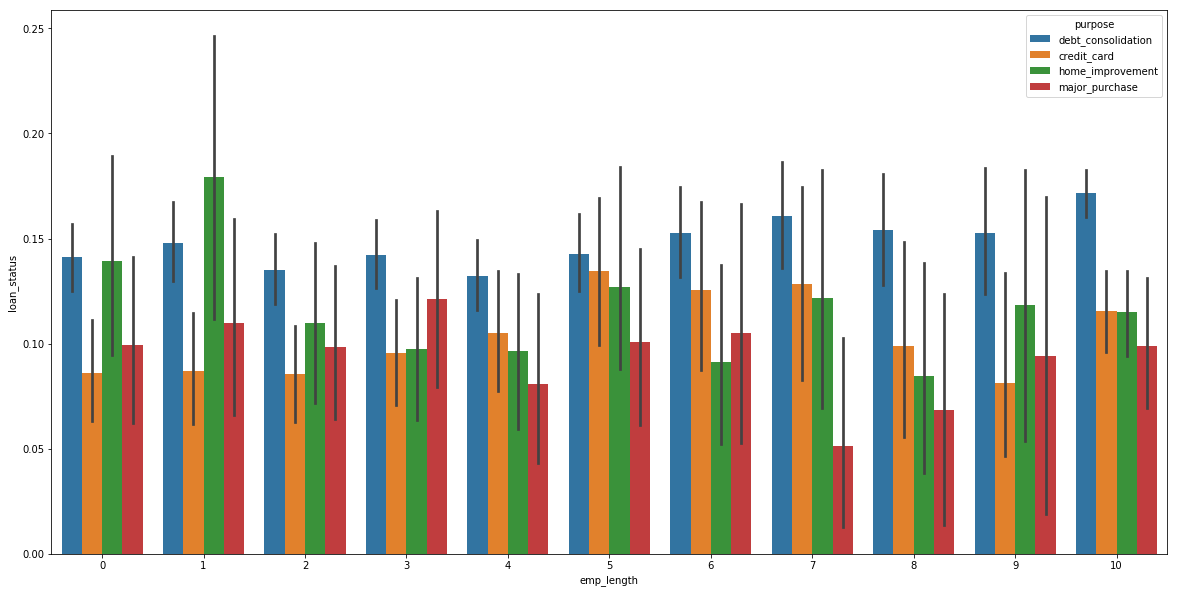

In [91]:
#plot a graph between emp_length and loan_status and purpose
plt.figure(figsize=(20,10))
sns.barplot(x='emp_length', y="loan_status", hue='purpose', data=df)
plt.show()

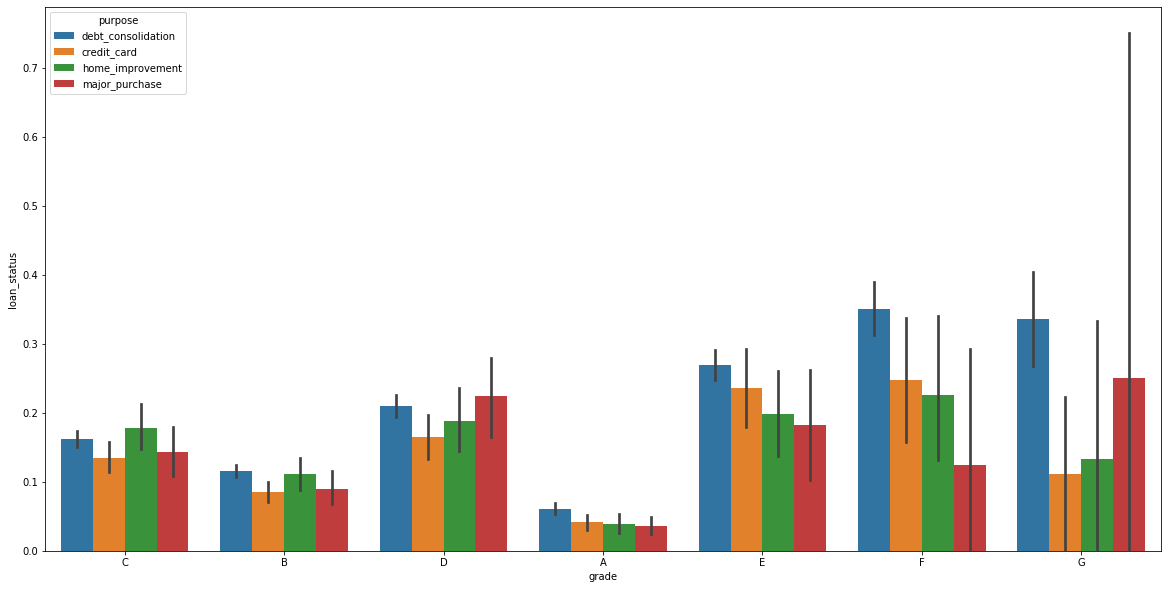

In [71]:
#plot a graph between grade and loan_status and purpose
plt.figure(figsize=(20,10))
sns.barplot(x='grade', y="loan_status", hue='purpose', data=data)
plt.show()

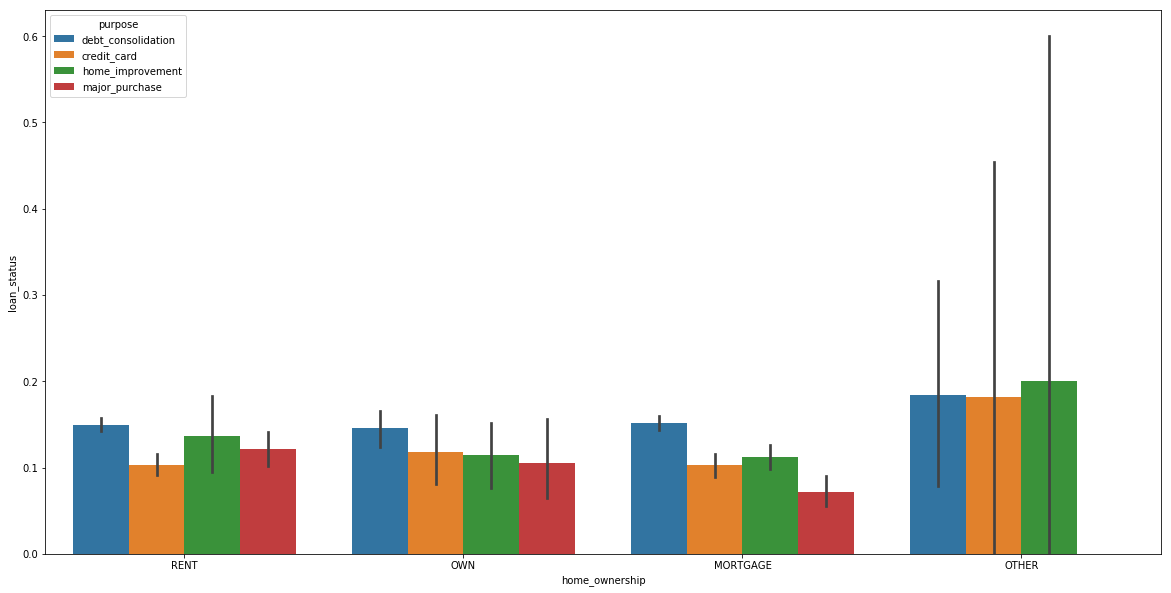

In [92]:
#plot a graph between term and loan_status and purpose
plt.figure(figsize=(20,10))
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=df)
plt.show()

other is having the highest loan status value

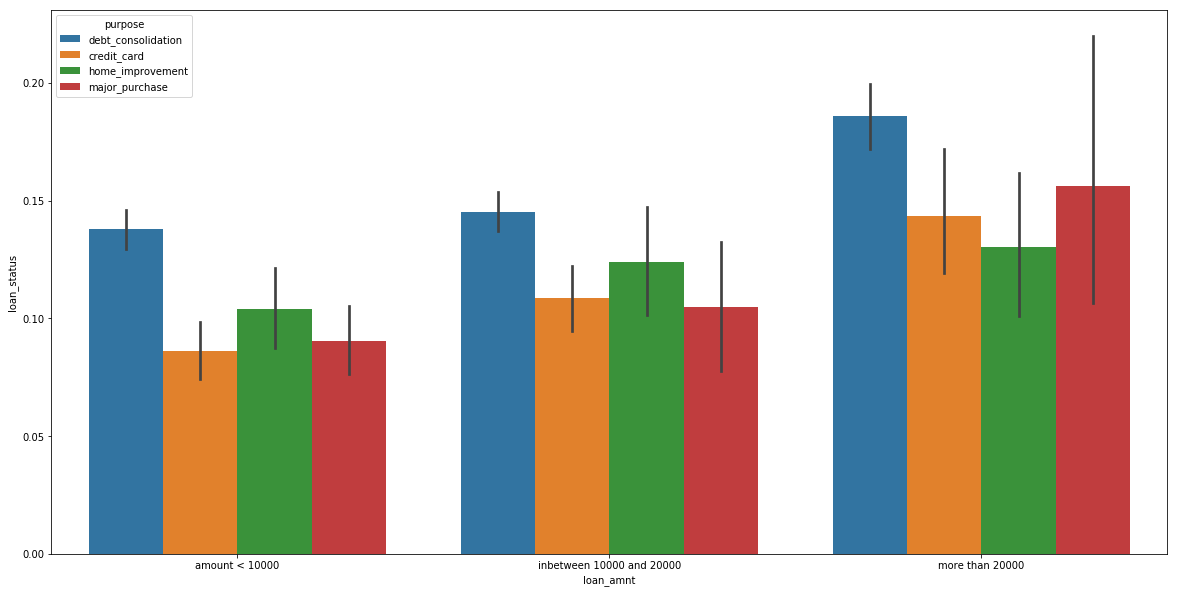

In [93]:
#plot a graph between loan ammount and loan_status and purpose
plt.figure(figsize=(20,10))
sns.barplot(x="loan_amnt", y="loan_status", hue='purpose', data=df)
plt.show()

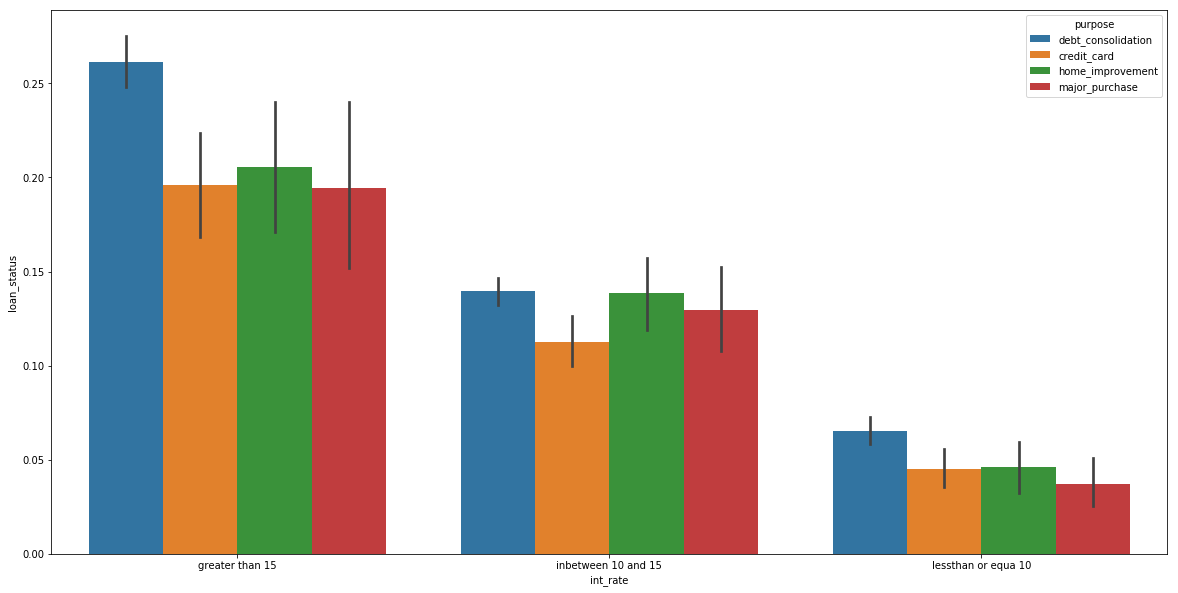

In [94]:
#plot a graph between int_rate and loan_status and purpose
plt.figure(figsize=(20,10))
sns.barplot(x='int_rate', y="loan_status", hue='purpose', data=df)
plt.show()

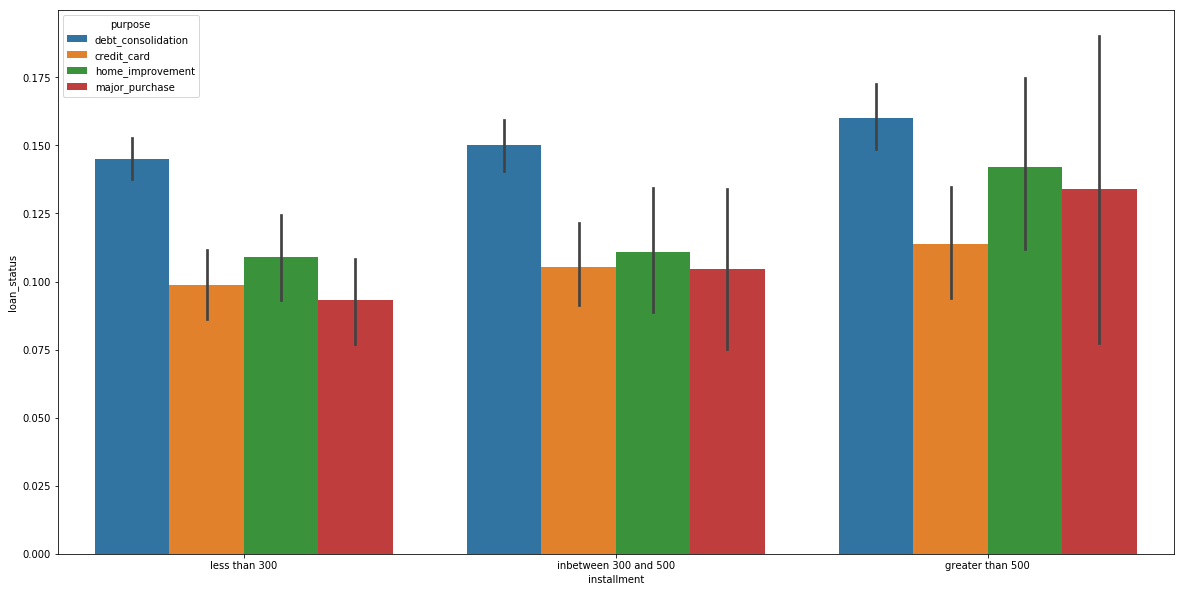

In [95]:
#plot a graph between installment and loan_status and purpose
plt.figure(figsize=(20,10))
sns.barplot(x='installment', y="loan_status", hue='purpose', data=df)
plt.show()

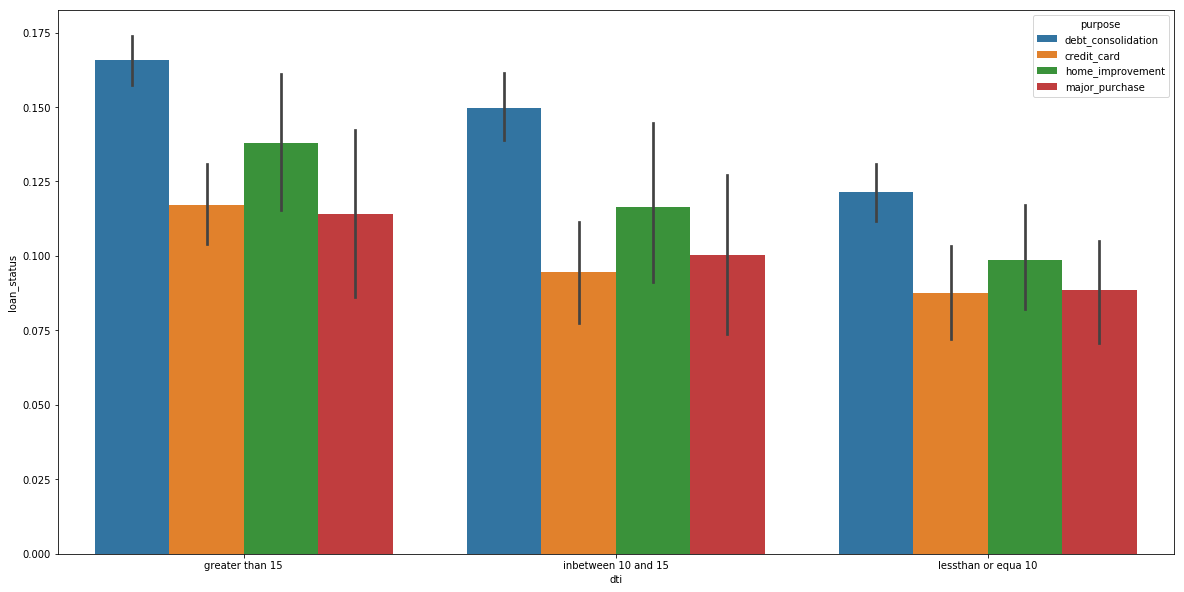

In [96]:
#plot a graph between dti and loan_status and purpose
plt.figure(figsize=(20,10))
sns.barplot(x='dti', y="loan_status", hue='purpose', data=df)
plt.show()

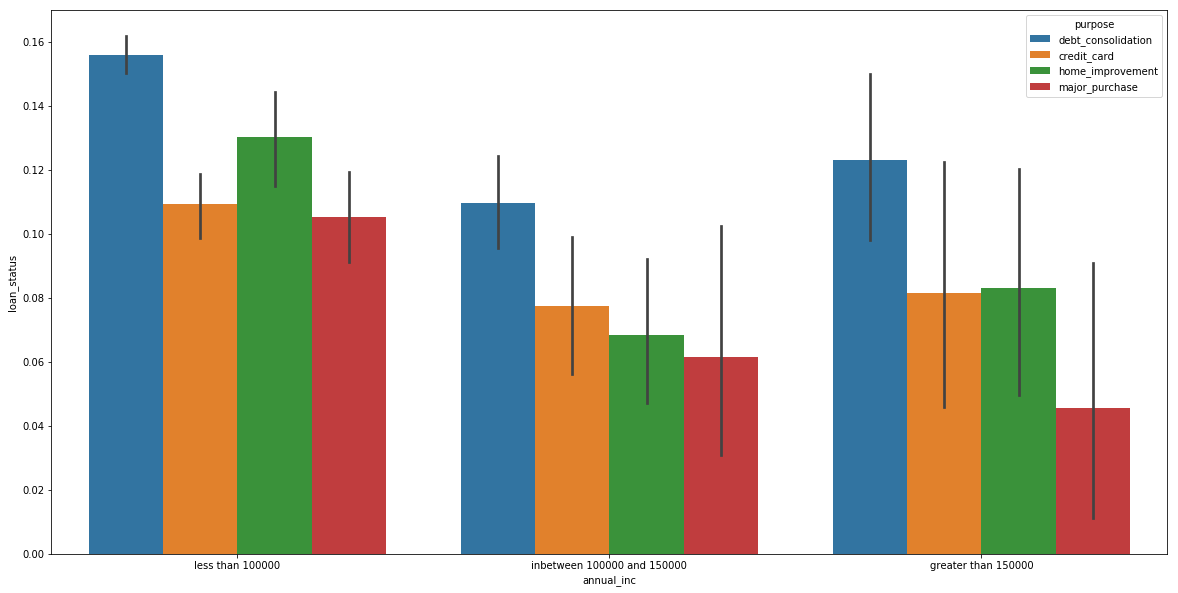

In [97]:
#plot a graph between annual_inc and loan_status and purpose
plt.figure(figsize=(20,10))
sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=df)
plt.show()

# observations

In [99]:
#again read the data set
os.chdir("F://Study//Sem-6//upgrad//loan")
path=os.getcwd()+"/loan.csv"                             #for storing the path
df2=pd.read_csv(path)

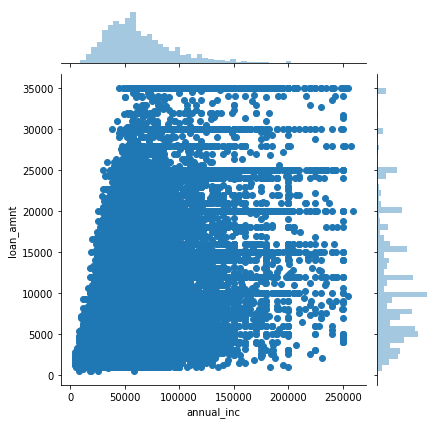

In [101]:
#plot a joint plot for anual_inc and loan ammount which are having income less than 260000
sns.jointplot('annual_inc', 'loan_amnt',df2.loc[df2['annual_inc']<260000])
plt.show()

Most of the people iin 50000 to 150000 took the loan ammounts

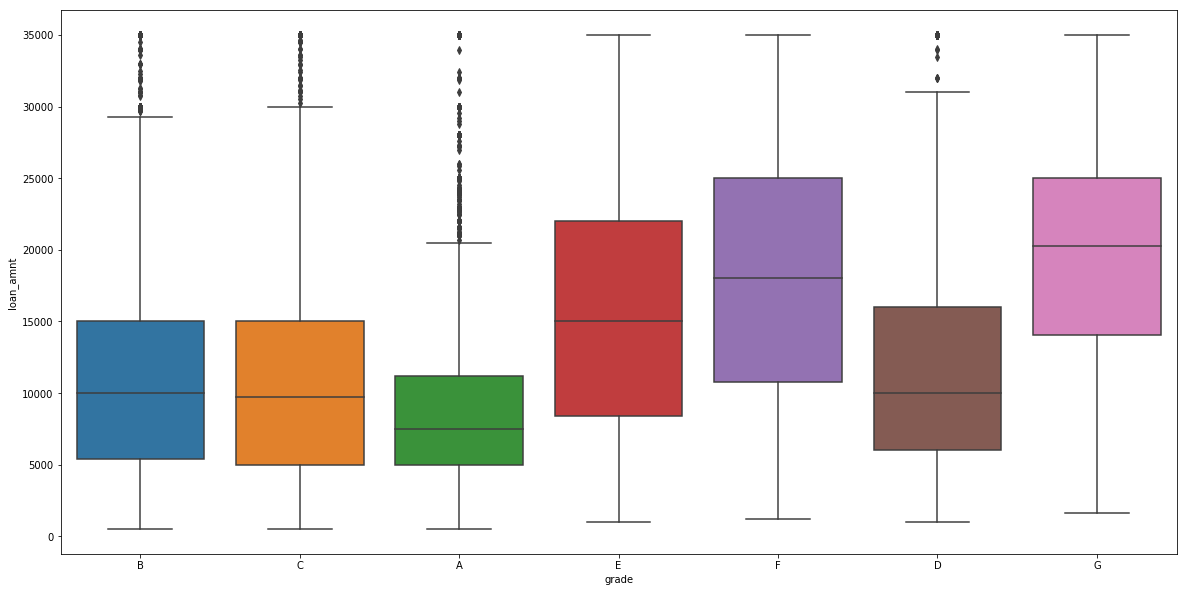

In [102]:
#plot a boxplot between grade and loan_amnt and purpose
plt.figure(figsize=(20,10))
sns.boxplot(x='grade',y='loan_amnt',data=df2)
plt.show()

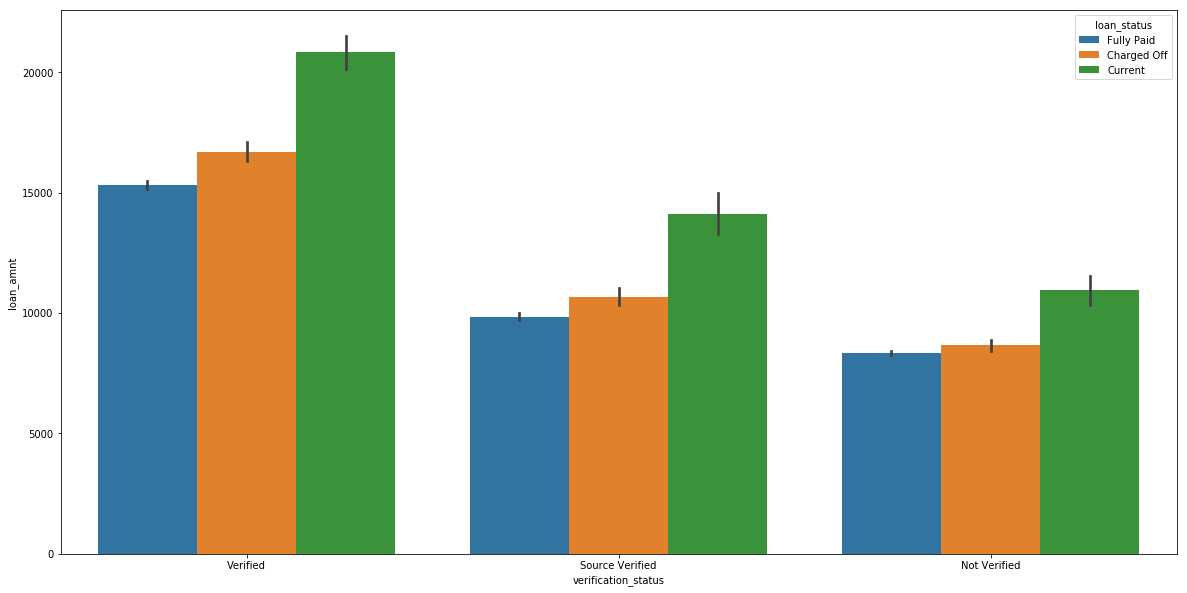

In [103]:
#plot a bargraph between verification status and loan_status and loan_amnt
plt.figure(figsize=(20,10))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status",data=df2)
plt.show()

most of the loan ammount is verified

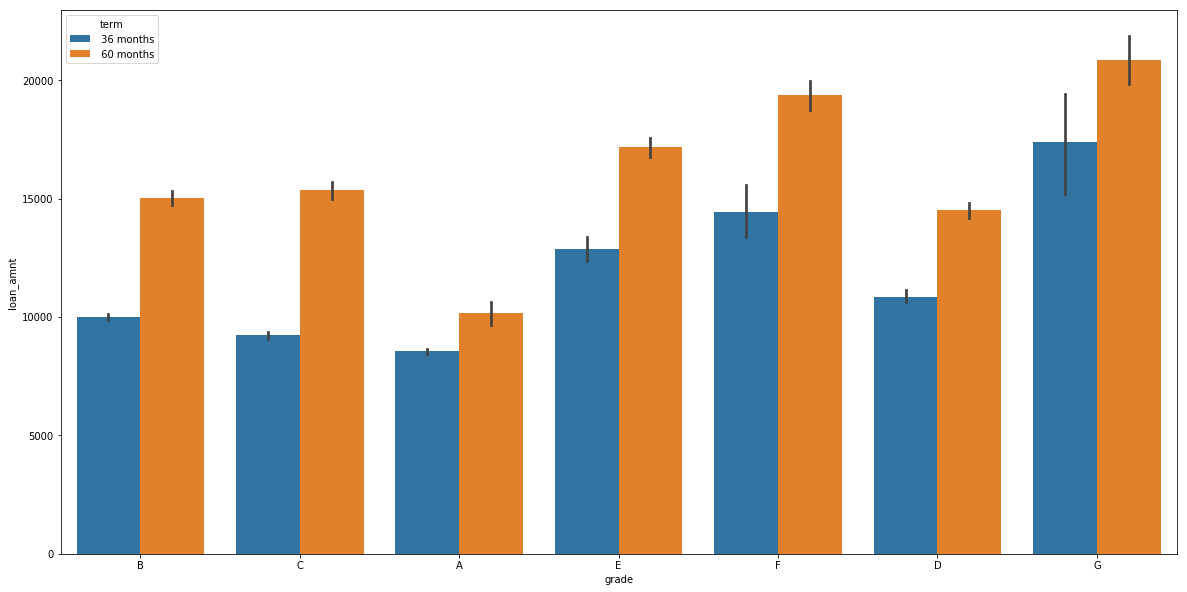

In [104]:
#plot a bargraph between grade and loan_status and term
plt.figure(figsize=(20,10))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df2)
plt.show()

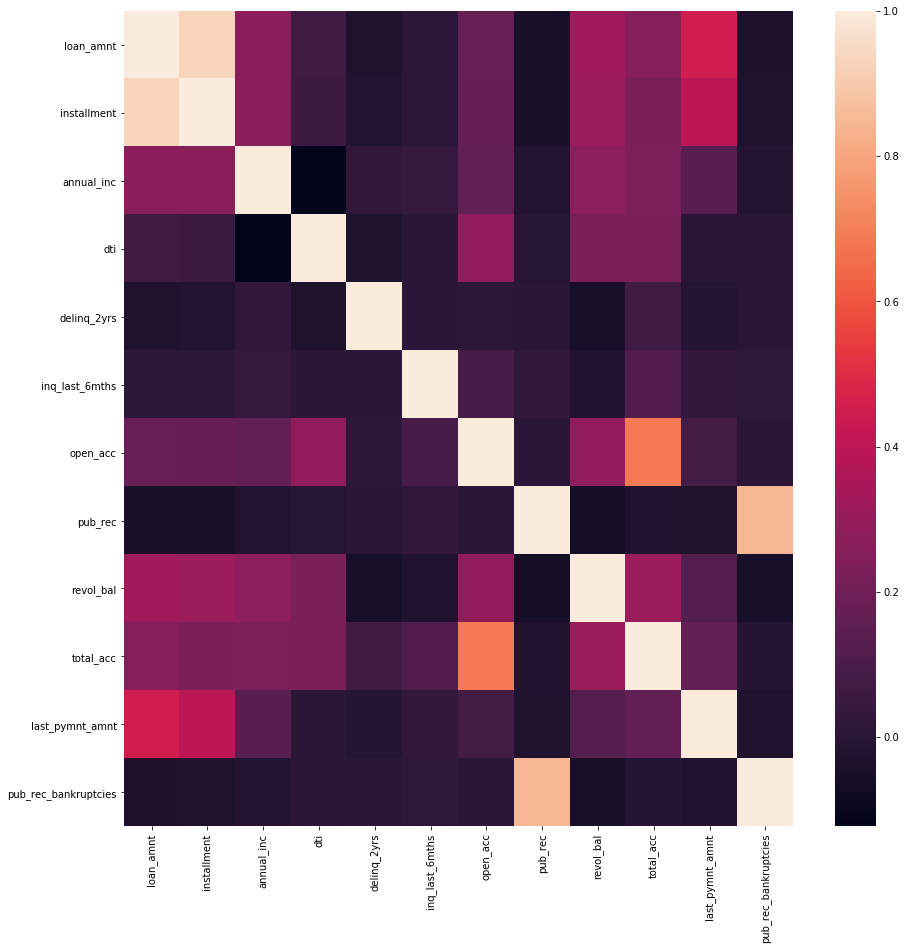

In [105]:
#plot a heatmap for clear observation
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df2[cont_var].corr()
sns.heatmap(corr)